# House Prices Regression
https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import IsolationForest
import sklearn.metrics as metrics
from sklearn.ensemble import GradientBoostingRegressor
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.diagnostic import het_white
%matplotlib inline

# LOAD DATABASE

In [2]:
train= pd.read_csv(r'C:\Users\sousa\Desktop\Outros\py projects\Kaggle\house-prices-advanced-regression-techniques\train.csv')
test= pd.read_csv(r'C:\Users\sousa\Desktop\Outros\py projects\Kaggle\house-prices-advanced-regression-techniques\test.csv')

PoolQC         0.995205
MiscFeature    0.963014
Alley          0.937671
Fence          0.807534
FireplaceQu    0.472603
                 ...   
ExterQual      0.000000
Exterior2nd    0.000000
Exterior1st    0.000000
RoofMatl       0.000000
SalePrice      0.000000
Length: 81, dtype: float64


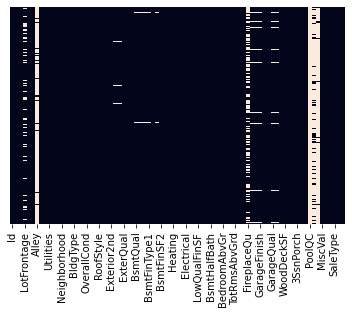

In [3]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False)
print(train.isnull().sum().sort_values(ascending=False)/len(train))

In [4]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
train.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu','LotFrontage'],axis=1,inplace=True)

In [6]:
# Filling with most frequent and mean
train=train.fillna(train.mean())

C:\Users\sousa\AppData\Local\Temp/ipykernel_13192/3654458027.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  train=train.fillna(train.mean())


# Outliers detection

<AxesSubplot:xlabel='SalePrice'>

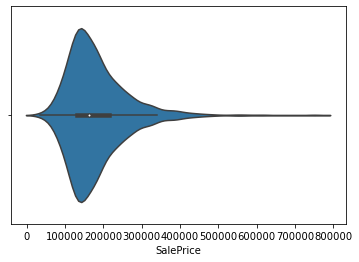

In [7]:
sns.violinplot(x='SalePrice',data=train)

In [8]:
random.seed(101)
md_IsFo = IsolationForest(contamination=0.01)

In [9]:
a=list(train.select_dtypes(['int']).columns)
b=list(train.select_dtypes(['float']).columns)
c=a+b

In [10]:
c=c[1:]

In [11]:
md_IsFo.fit(train[c])
outliers = md_IsFo.predict(train[c]) ==-1

In [12]:
train[outliers]

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
53,54,20,RL,50271,Pave,IR1,Low,AllPub,Inside,Gtl,...,0,0,0,0,0,11,2006,WD,Normal,385000
185,186,75,RM,22950,Pave,IR2,Lvl,AllPub,Inside,Gtl,...,0,0,410,0,0,6,2006,WD,Normal,475000
197,198,75,RL,25419,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,552,0,0,512,0,3,2006,WD,Abnorml,235000
440,441,20,RL,15431,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,170,0,0,4,2009,WD,Normal,555000
523,524,60,RL,40094,Pave,IR1,Bnk,AllPub,Inside,Gtl,...,0,0,0,0,0,10,2007,New,Partial,184750
635,636,190,RH,10896,Pave,Reg,Bnk,AllPub,Inside,Gtl,...,0,0,0,0,0,3,2007,WD,Abnorml,200000
691,692,60,RL,21535,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,1,2007,WD,Normal,755000
769,770,60,RL,53504,Pave,IR2,HLS,AllPub,CulDSac,Mod,...,0,0,210,0,0,6,2010,WD,Normal,538000
898,899,20,RL,12919,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,3,2010,New,Partial,611657
1169,1170,60,RL,35760,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,...,0,0,0,0,0,7,2006,WD,Normal,625000


In [13]:
#removing outliers
train=train[~outliers]

# BUILDING FACTORS

In [14]:
def qualfun(colunax):
    if colunax == 'Ex':
            return 1
    elif colunax == 'Gd':
            return 0.8
        
    elif colunax == 'TA':
            return 0.5
        
    elif colunax == 'Far':
            return 0.2
        
    elif colunax == 'Po':
            return 0.05
        
    else:
            return 0

In [15]:
def GarageType(colunax):
    if colunax == 'CarPort':
            return 0.05
        
    elif colunax == 'Detchd':
            return 0.10
        
    elif colunax == '2Types':
            return 0.15
        
    elif colunax == 'Basment':
            return 0.20
        
    elif colunax == 'Attchd':
            return 0.25
        
    elif colunax == 'BuiltIn':
            return 0.35
        
    else:
            return 0

In [16]:
def GarageFinish(colunax):
    if colunax == 'Unf':
            return 1
        
    elif colunax == 'RFn':
            return 2
        
    elif colunax == 'Fin':
            return 3
        
    else:
            return 0

In [17]:
def GarageFactor(colunax):
    if colunax >0:
            return np.log(colunax)
        
    else:
            return 0

## Garage

In [18]:
train.drop(['GarageCond','GarageQual'],axis=1,inplace=True)
train['GarageType'] = train.apply(lambda x: GarageType(x['GarageType']),axis=1)
train['GarageFinish'] = train.apply(lambda x: GarageFinish(x['GarageFinish']),axis=1)

<AxesSubplot:xlabel='GarageFactor', ylabel='SalePrice'>

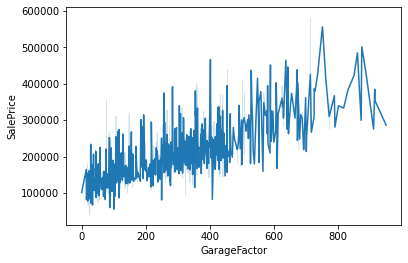

In [19]:
train['GarageFactor']= train['GarageArea']*train['GarageFinish']*train['GarageType']
sns.lineplot(x='GarageFactor', y='SalePrice', data=train)

In [20]:
train['GarageFactor'] = train.apply(lambda x: GarageFactor(x['GarageFactor']),axis=1)

## Basement

In [21]:
train['BsmtQual'] = train.apply(lambda x: qualfun(x['BsmtQual']),axis=1)
train['BsmtCond'] = train.apply(lambda x: qualfun(x['BsmtCond']),axis=1)

## Years

In [22]:
train['YearBuilt']=2016-train['YearBuilt']
train['YearRemodAdd']=2016-train['YearRemodAdd']
train['YrSold']= 2016-train['YrSold']

## Rooms

In [23]:
train['KitchenQual']= train.apply(lambda x: qualfun(x['KitchenQual']),axis=1)
train['bedroomperrooms']=train['BedroomAbvGr']/train['TotRmsAbvGrd']
train['kitchenfactor']=train['KitchenAbvGr']*train['KitchenQual']

# SELECT VARIABLES

In [24]:
train=train[['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'GarageFactor', 'bedroomperrooms',
       'kitchenfactor', 'SalePrice']]

<AxesSubplot:>

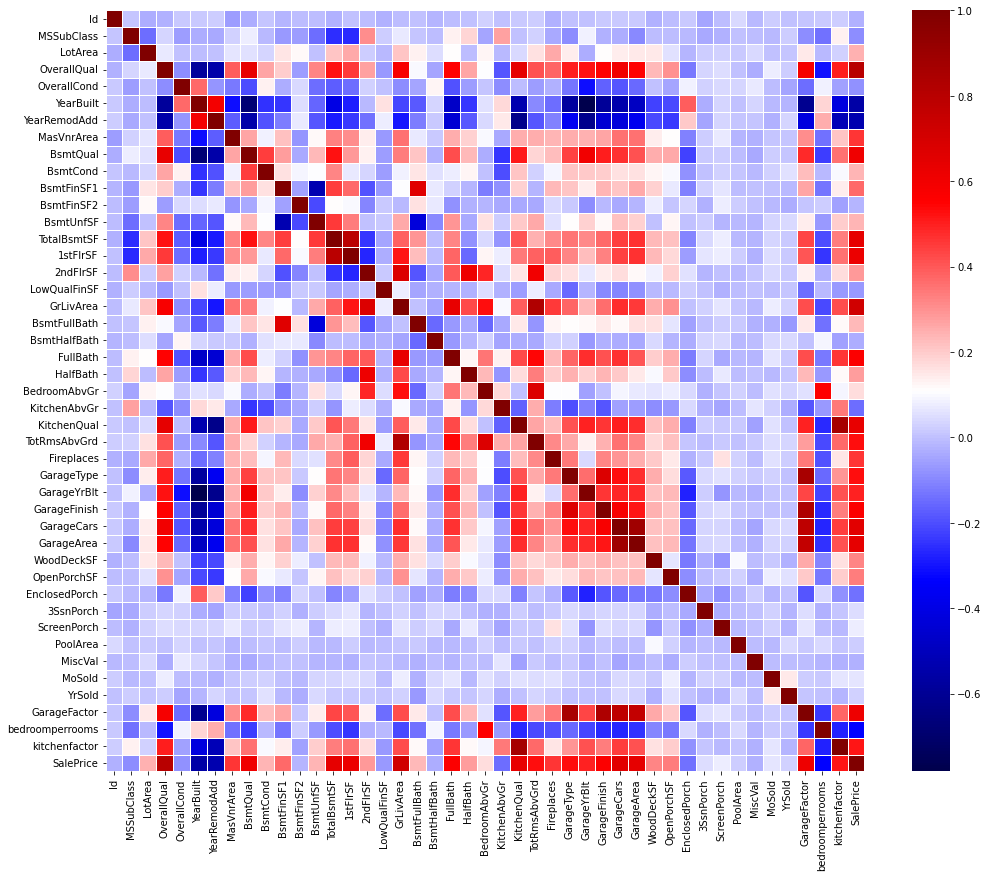

In [25]:
plt.figure(figsize=(17,14))
sns.heatmap(train.corr(), cmap='seismic', annot=False, linewidth=0.5)

In [26]:
corr_matrix = train.select_dtypes(np.number).corr()
corr = corr_matrix["SalePrice"].sort_values(ascending = False)
print(corr)
indexNames = corr[abs(corr.values) < 0.4].index.values
indexNames = np.setdiff1d(indexNames, ['Id','MSSubClass'])
#print(len(indexNames), indexNames)
#train.drop(indexNames , inplace=True, axis = 1)
#len(train.columns)
#test.drop(indexNames , inplace=True, axis = 1)
#print(train.shape[1],test.shape[1])

SalePrice          1.000000
OverallQual        0.803289
GrLivArea          0.718651
GarageCars         0.655257
GarageArea         0.642866
TotalBsmtSF        0.639550
KitchenQual        0.634166
1stFlrSF           0.618166
GarageFactor       0.614972
BsmtQual           0.609750
FullBath           0.567902
GarageFinish       0.566880
GarageType         0.529535
TotRmsAbvGrd       0.528299
kitchenfactor      0.515851
GarageYrBlt        0.494059
Fireplaces         0.463137
MasVnrArea         0.458888
BsmtFinSF1         0.373128
OpenPorchSF        0.335430
WoodDeckSF         0.322814
2ndFlrSF           0.288661
HalfBath           0.281395
LotArea            0.246406
BsmtCond           0.240132
BsmtUnfSF          0.236499
BsmtFullBath       0.227748
BedroomAbvGr       0.167928
ScreenPorch        0.080396
MoSold             0.064960
3SsnPorch          0.052395
YrSold             0.026734
PoolArea           0.021604
BsmtFinSF2        -0.017398
MiscVal           -0.024774
Id                -0

In [27]:
train=train[['OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 
             'MasVnrType', 'MasVnrArea','BsmtQual', 'BsmtCond', 
             'TotalBsmtSF','1stFlrSF','GrLivArea', 'FullBath','KitchenAbvGr', 'KitchenQual',
             'TotRmsAbvGrd', 'Fireplaces', 'GarageType', 'GarageYrBlt',
             'GarageCars', 'YrSold', 'GarageFactor', 'bedroomperrooms',
             'kitchenfactor','SalePrice']]

In [28]:
train['lnprice']=np.log(train['SalePrice'])

## Split sample

In [29]:
x = train[['OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
           'MasVnrArea','BsmtQual', 'BsmtCond','1stFlrSF','GrLivArea','FullBath','Fireplaces','GarageType','GarageCars','GarageYrBlt','YrSold',
           'TotalBsmtSF','KitchenAbvGr', 'KitchenQual',
           'TotRmsAbvGrd', 'GarageFactor', 'bedroomperrooms','kitchenfactor']]
y= train['SalePrice']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20,random_state=101)

# OLS MODEL

In [30]:
mod = sm.OLS(y_train,x_train)  
res = mod.fit(cov_type='HC1')
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.979
Model:                            OLS   Adj. R-squared (uncentered):              0.979
Method:                 Least Squares   F-statistic:                              2922.
Date:                Tue, 12 Apr 2022   Prob (F-statistic):                        0.00
Time:                        01:37:49   Log-Likelihood:                         -13475.
No. Observations:                1156   AIC:                                  2.699e+04
Df Residuals:                    1134   BIC:                                  2.711e+04
Df Model:                          22                                                  
Covariance Type:                  HC1                                                  
                      coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------

In [31]:
predctions=res.predict(x_test)

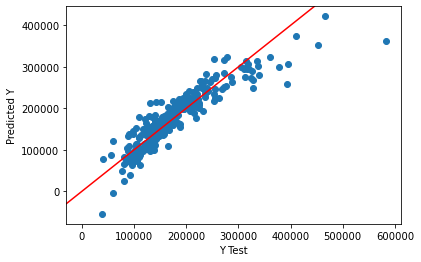

In [32]:
plt.scatter(y_test,predctions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.axline([0, 0], [1, 1],color = 'red')

In [33]:
print(np.sqrt(metrics.mean_squared_error(y_test, predctions)))

31539.440813155114


# GradientBoostingRegressor

In [39]:
reg = GradientBoostingRegressor(n_estimators=1250, learning_rate=0.01, max_depth=5, random_state=101).fit(x_train, y_train)
reg.score(x_test, y_test)

0.87646008122496

In [40]:
predctions=reg.predict(x_test)

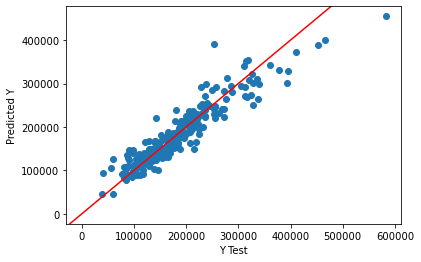

In [41]:
plt.scatter(y_test,predctions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.axline([0, 0], [1, 1],color = 'red')

In [42]:
print(np.sqrt(metrics.mean_squared_error(y_test, predctions)))

26219.56663567718


# SUBMITION

In [ ]:
#Garage
test['GarageType'] = test.apply(lambda x: GarageType(x['GarageType']),axis=1)
test['GarageFinish'] = test.apply(lambda x: GarageFinish(x['GarageFinish']),axis=1)
test['GarageFactor']= test['GarageArea']*test['GarageFinish']*test['GarageType']
test['GarageFactor'] = test.apply(lambda x: GarageFactor(x['GarageFactor']),axis=1)

#Basement
test['BsmtQual'] = test.apply(lambda x: qualfun(x['BsmtQual']),axis=1)
test['BsmtCond'] = test.apply(lambda x: qualfun(x['BsmtCond']),axis=1)

#Years
test['YearBuilt']=2016-test['YearBuilt']
test['YearRemodAdd']=2016-test['YearRemodAdd']
test['YrSold']= 2016-test['YrSold']

#Rooms
test['KitchenQual']= test.apply(lambda x: qualfun(x['KitchenQual']),axis=1)
test['bedroomperrooms']=test['BedroomAbvGr']/test['TotRmsAbvGrd']
test['kitchenfactor']=test['KitchenAbvGr']*test['KitchenQual']


test=test.fillna(0)

In [ ]:
test_x = test[x.columns]

In [ ]:
predctions=reg.predict(test_x)
predctions

In [ ]:
my_submission = pd.DataFrame({'Id': test['Id'], 'SalePrice': predctions})

In [ ]:
my_submission

In [ ]:
my_submission.to_csv('sub.csv', index=False)

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
my_submission.columns

In [ ]:
my_submission[my_submission['Id']==2121]

In [ ]:
test_x[test_x['Id']==2121]